In [44]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Parameters
n_lags = 48  # Number of lag observations to use as input
n_forecast = 1  # Number of steps to forecast

# nonIID

Mean Squared Error: 0.0000


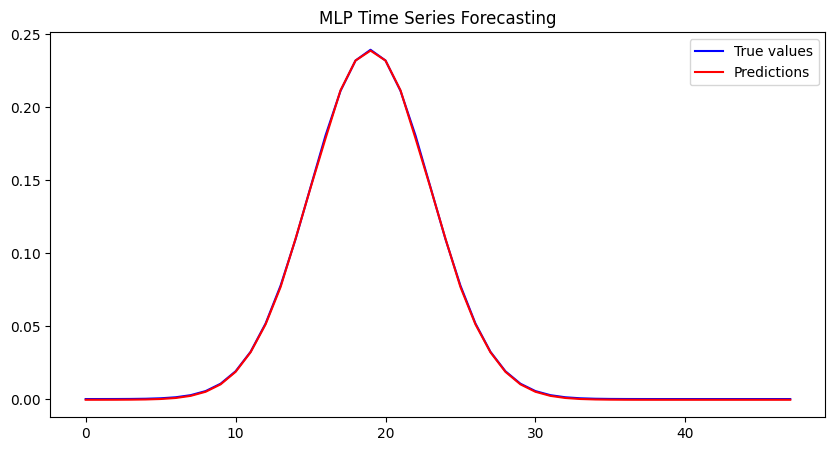

                  0             1             2             3             4  \
0      3.010298e-06  1.218398e-05  6.558998e-06  4.282826e-08  6.548248e-08   
1      9.569172e-06  3.873058e-05  2.084982e-05  1.748208e-07  2.672932e-07   
2      2.857524e-05  1.156564e-04  6.226125e-05  6.703574e-07  1.024946e-06   
3      8.015965e-05  3.244408e-04  1.746561e-04  2.414739e-06  3.692028e-06   
4      2.112382e-04  8.549723e-04  4.602570e-04  8.171177e-06  1.249336e-05   
...             ...           ...           ...           ...           ...   
17467  3.646144e-09  1.475752e-08  7.944413e-09  2.421746e-06  3.702741e-06   
17468  7.885339e-10  3.191538e-09  1.718100e-09  6.724946e-07  1.028214e-06   
17469  1.602004e-10  6.484003e-10  3.490531e-10  1.754307e-07  2.682257e-07   
17470  3.057478e-11  1.237494e-10  6.661796e-11  4.299114e-08  6.573152e-08   
17471  5.481755e-12  2.218704e-11  1.194394e-11  9.897122e-09  1.513226e-08   

                  5             6             7    

In [ ]:
data = pd.read_csv('nonIID.csv')
data.columns = pd.to_numeric(data.columns)
train = data[0:17520]
test = data[17520:35040]

# Convert time series into input-output pairs for supervised learning
x_train, y_train = train[0 : len(train) - n_lags - n_forecast +1], train[n_lags : len(train)]
x_test, y_test = test[0 : len(test) - n_lags - n_forecast+1].reset_index(drop=True), test[n_lags : len(test)].reset_index(drop=True)

# Cluster 1 
mlp_1 = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
mlp_1.fit(x_train.iloc[:,0:3], y_train.iloc[:,0:3])

# Predict and evaluate the model
y_pred = mlp_1.predict(x_test.iloc[:,0:3])
mse = mean_squared_error(y_test.iloc[:,0:3], y_pred)
print(f'Mean Squared Error: {mse:.4f}')

# Visualize the forecast
plt.figure(figsize=(10, 5))
plt.plot(y_test.iloc[0:48,0], label="True values", color="blue")
plt.plot(pd.DataFrame(y_pred).iloc[0:48,0], label="Predictions", color="red")
plt.legend()
plt.title("MLP Time Series Forecasting")
plt.show()